In [1]:
import pandas as pd
import matplotlib
# matplotlib.use('TkAgg')  # Set the interactive backend
import matplotlib.pyplot as plt

In [2]:
df_csv = pd.read_csv('FullErrorSignalConvertedToFrequencyDifference.csv',header=1)

In [3]:
df_csv

,second,Volt,Millivolt,Absolute Frequency Difference / Hz,Relative Frequency Difference
0,16.4,-0.010400,-10.400,-1530.00,-3.520000e-12
1,16.4,-0.010800,-10.800,-1590.00,-3.660000e-12
2,16.4,0.000036,0.036,5.29,1.220000e-14
3,16.4,-0.001970,-1.970,-290.00,-6.670000e-13
4,16.4,-0.003180,-3.180,-467.00,-1.070000e-12
...,...,...,...,...,...
144406,1170.0,-0.001970,-1.970,-290.00,-6.670000e-13
144407,1170.0,0.000840,0.840,123.00,2.830000e-13
144408,1170.0,-0.001170,-1.170,-172.00,-3.960000e-13
144409,1170.0,-0.006800,-6.800,-999.00,-2.300000e-12


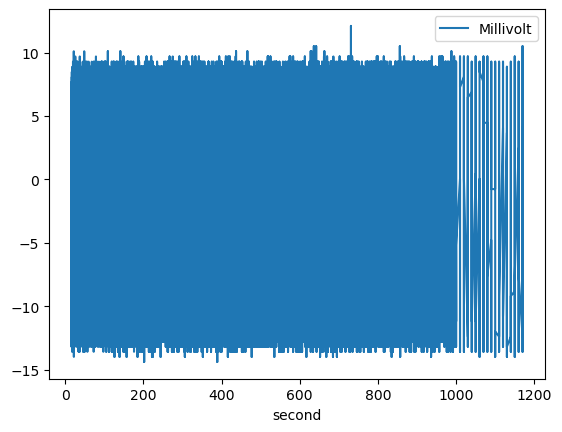

In [4]:
df_csv.plot(x='second', y='Millivolt')
plt.show()

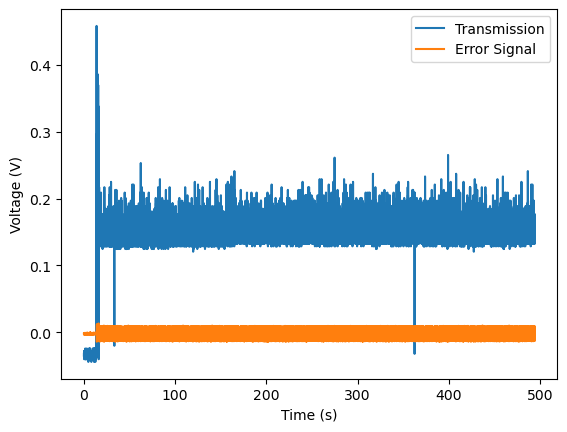

In [5]:
df1 = pd.read_csv("scope_1.csv", header=1)
time1 = df1['second'].to_numpy()
transmission1 = df1['Volt'].to_numpy()
errorsignal1 = df1['Volt.1'].to_numpy()
plt.plot(time1, transmission1, label='Transmission')
plt.plot(time1, errorsignal1, label='Error Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# t = 16.336 start of lock

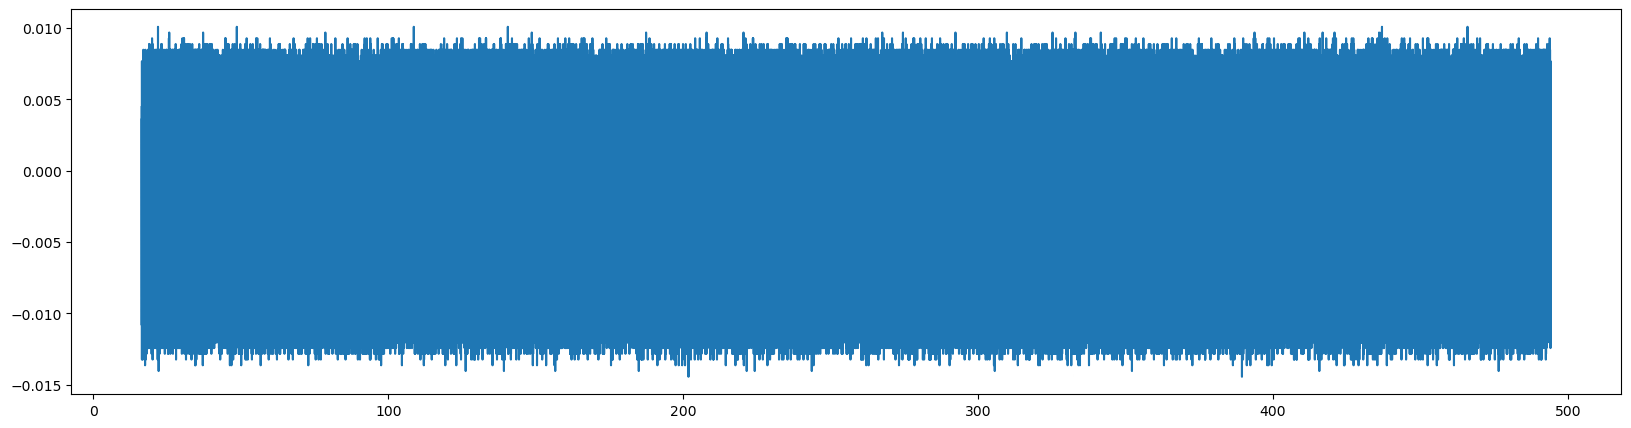

In [6]:
errorsignal1_sliced = errorsignal1[time1 > 16.336]
time1_sliced = time1[time1 > 16.336] 
plt.figure(figsize=(20, 5))
plt.plot(time1_sliced, errorsignal1_sliced, label='Error Signal Sliced')
plt.show()

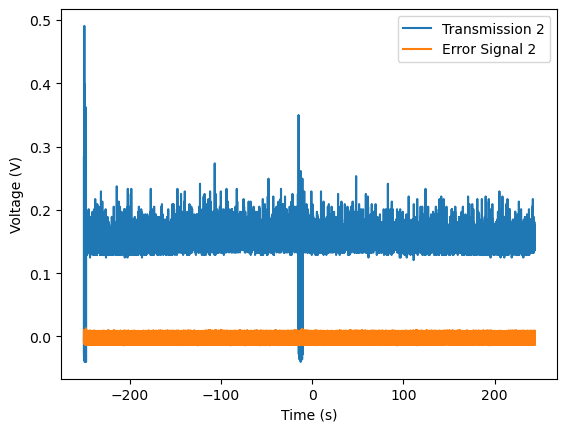

In [7]:
df2 = pd.read_csv("scope_3.csv", header=1)
time2 = df2['second'].to_numpy()
transmission2 = df2['Volt'].to_numpy()
errorsignal2 = df2['Volt.1'].to_numpy()
plt.plot(time2, transmission2, label='Transmission 2')
plt.plot(time2, errorsignal2, label='Error Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# t = -247.675 after all nice, but can use full spectrum too

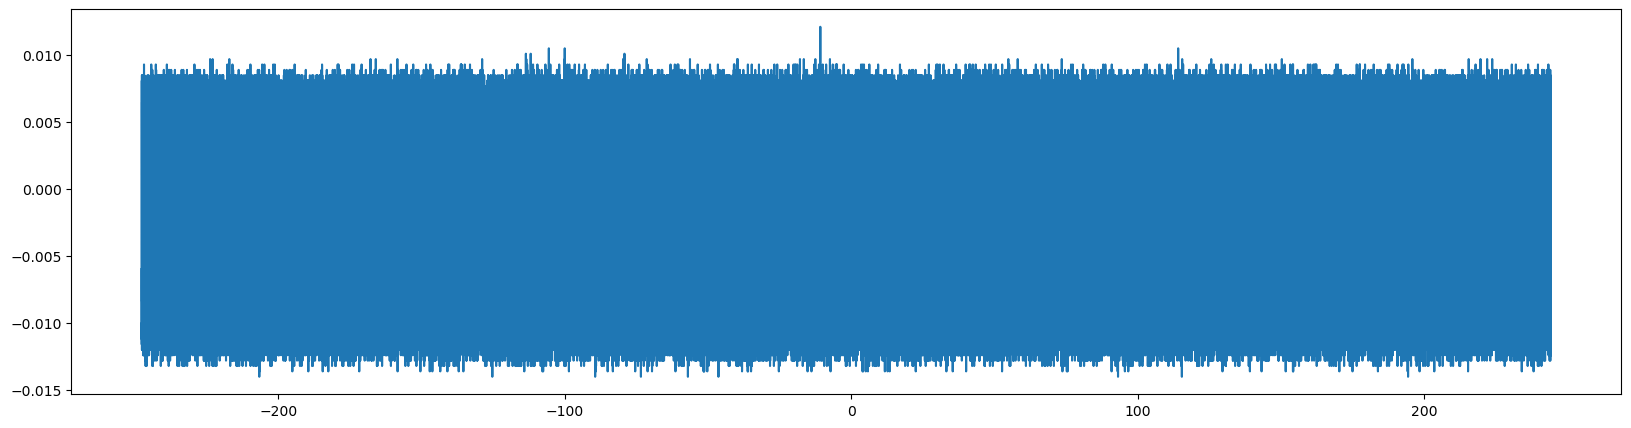

In [8]:
errorsignal2_sliced = errorsignal2[time2 > -247.675]
time2_sliced = time2[time2 > -247.675]
plt.figure(figsize=(20, 5))
plt.plot(time2_sliced, errorsignal2_sliced, label='Error Signal 2 Sliced')
plt.show()

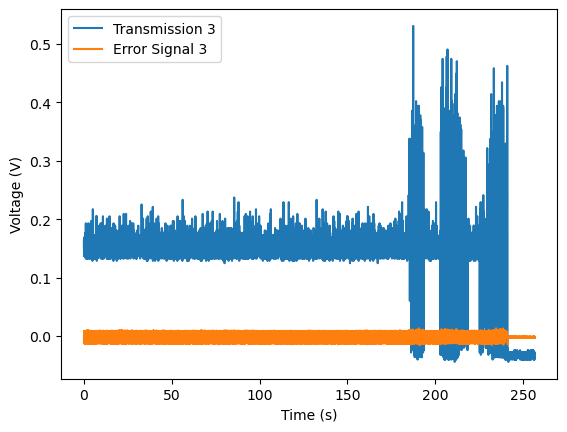

In [9]:
df3 = pd.read_csv("scope_4.csv", header=1)
time3 = df3['second'].to_numpy()
transmission3 = df3['Volt'].to_numpy()
errorsignal3 = df3['Volt.1'].to_numpy()
plt.plot(time3, transmission3, label='Transmission 3')
plt.plot(time3, errorsignal3, label='Error Signal 3')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# t= 239.400 stop lock

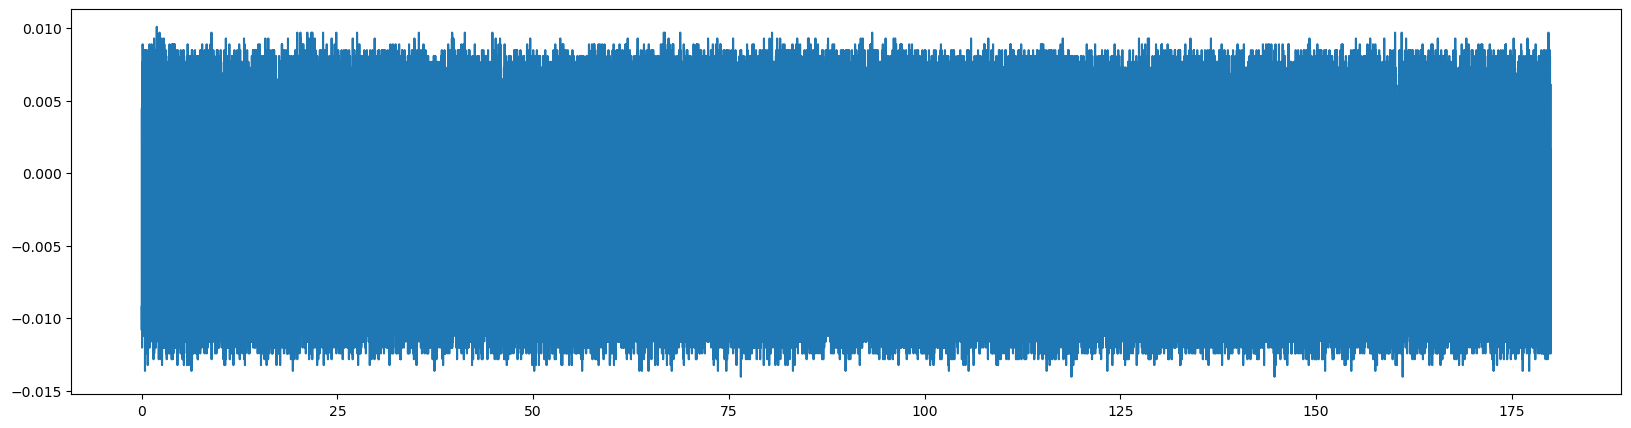

In [10]:
errorsignal3_sliced = errorsignal3[time3 < 180]
time3_sliced = time3[time3 < 180]
plt.figure(figsize=(20, 5))
plt.plot(time3_sliced, errorsignal3_sliced, label='Error Signal 3 Sliced')
plt.show()

concatenate

In [11]:
import numpy as np

# Concatenate the sliced error signals from 1, 2, and 3
errorsignal_concat = np.concatenate([errorsignal1_sliced, errorsignal2_sliced, errorsignal3_sliced])
time_concat = np.arange(len(errorsignal_concat)) * 0.008  # 8 ms per sample

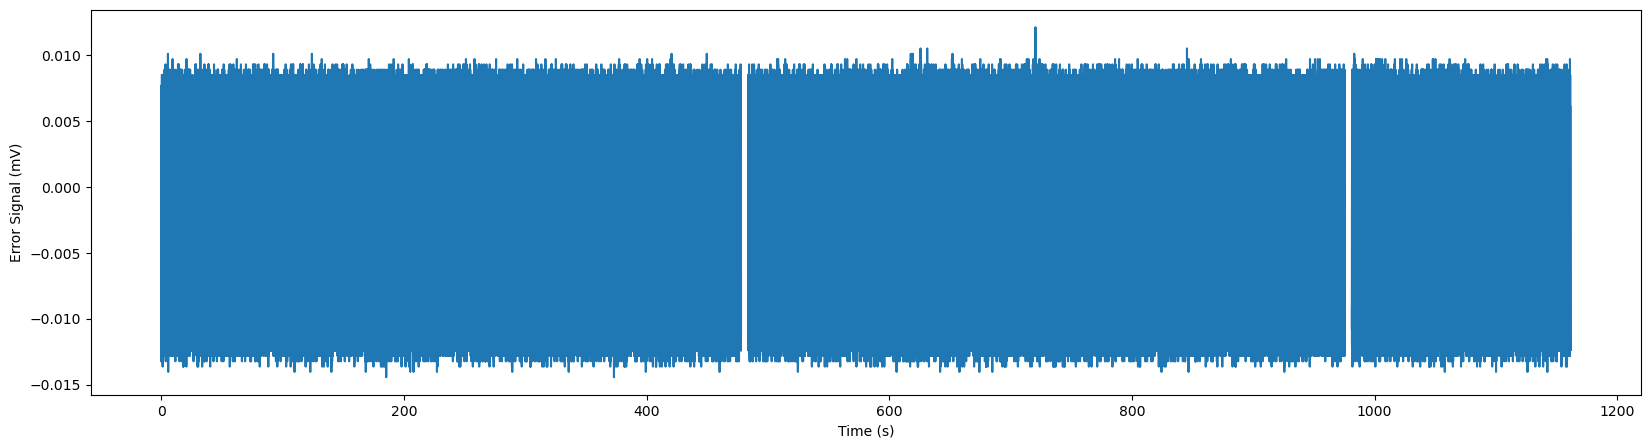

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(time_concat, errorsignal_concat, label='Concatenated Error Signal vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Error Signal (mV)')
plt.show()

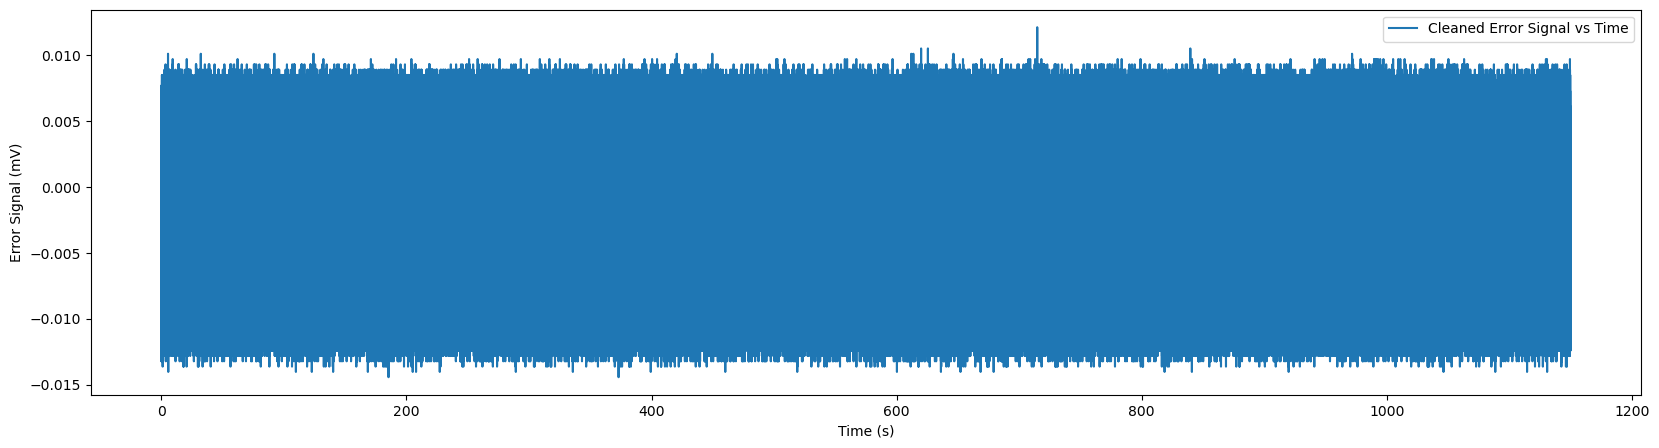

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Concatenate as usual
errorsignal_concat = np.concatenate([errorsignal1_sliced, errorsignal2_sliced, errorsignal3_sliced])

# Step 2: Identify valid (finite) data points
valid_indices = np.isfinite(errorsignal_concat)

# Step 3: Filter out invalid points
errorsignal_clean = errorsignal_concat[valid_indices]

# Step 4: Rebuild time array with continuous spacing (8 ms per sample)
time_clean = np.arange(len(errorsignal_clean)) * 0.008

# Step 5: Plot
plt.figure(figsize=(20, 5))
plt.plot(time_clean, errorsignal_clean, label='Cleaned Error Signal vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Error Signal (mV)')
plt.legend()
plt.show()


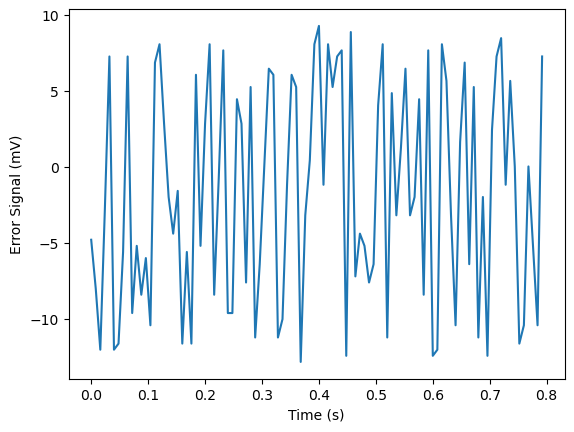

In [14]:
plt.plot(time_concat[4800:4900]-time_concat[4800], errorsignal_concat[4800:4900]*1e3, label='Error Signal vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Error Signal (mV)')
plt.show()

In [15]:
# export_time = time_concat[4800:4900] - time_concat[4800]
# export_slice = errorsignal_concat[4800:4900] * 1e3 
# export_df = pd.DataFrame({
#     'Time (s)': export_time,
#     'Error Signal (mV)': export_slice
# })
# export_df.to_csv('errorsignal_slice_4800_4900.csv', index=False)

# 250614 Plot nice plot

In [22]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

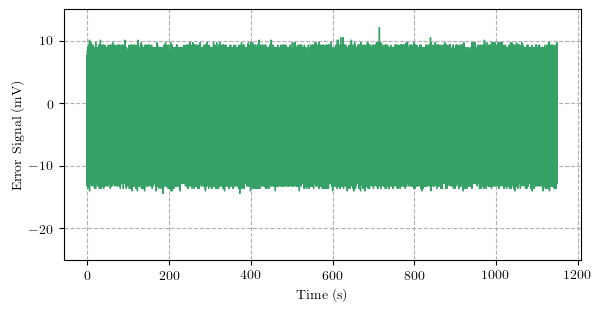

In [27]:
import matplotlib.pyplot as plt

mediumseagreen = (60/255, 179/255, 113/255)
darker = tuple([c * 0.9 for c in mediumseagreen])

plt.plot(time_clean, errorsignal_clean*1e3, color=darker)
plt.xlabel('Time (s)')
plt.ylabel('Error Signal (mV)')
plt.ylim(-25,15)
plt.yticks([-20,-10,0,10])
# plt.grid(False)
plt.savefig('250614 PDHLockHalfHourLongTermTrace.pdf',dpi=300)

In [18]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

In [19]:
calibration_conversion_factor = 146.97 #Hz/mV
frequency_variation = errorsignal_clean*1e3*calibration_conversion_factor

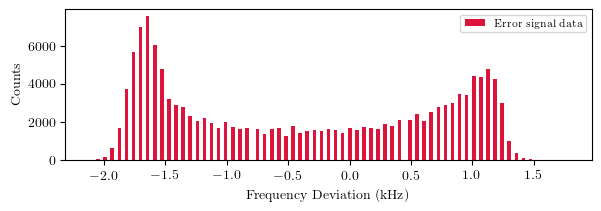

In [20]:
plt.hist(frequency_variation/1000, bins=135,color='crimson',label='Error signal data')
# ax1.set_xlabel('Frequency Deviation (kHz)')
plt.ylabel('Counts')
plt.xlabel('Frequency Deviation (kHz)')
# plt.title('Frequency Deviation Histogram')
plt.legend()
plt.grid(False)
plt.savefig('250614 PDHLockHalfHourFrequencyDeviationHistogramWithoutLockingRange.pdf',dpi=300)